In [1]:
import gdown
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import yeojohnson

In [2]:
# Locate and download the dataset
file_id = '1G_vIEJhnFOIiRSEq9us8gxhUbAFCFe0S'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'car.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1G_vIEJhnFOIiRSEq9us8gxhUbAFCFe0S
To: /content/car.csv
100%|██████████| 11.3k/11.3k [00:00<00:00, 21.5MB/s]


'car.csv'

In [3]:
df = pd.read_csv('car.csv')

In [4]:
# Check the dataset
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000


In [6]:
df.dtypes

,0
MPG,float64
Cylinders,int64
Displacement,float64
Horsepower,object
Weight,int64
Acceleration,float64
Model Year,int64
US Made,int64


In [7]:
df.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,0
Weight,0
Acceleration,0
Model Year,0
US Made,0


In [8]:
for column in df.columns:
  missing_value = (df.loc[:,column] == '?').sum()
  print(column, missing_value)

MPG 0
Cylinders 0
Displacement 0
Horsepower 6
Weight 0
Acceleration 0
Model Year 0
US Made 0


In [9]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

In [10]:
df.dtypes

,0
MPG,float64
Cylinders,int64
Displacement,float64
Horsepower,float64
Weight,int64
Acceleration,float64
Model Year,int64
US Made,int64


In [11]:
df.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
US Made,0


In [12]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


In [13]:
df.loc[pd.isna(df['Horsepower']), 'Horsepower'] = df['Horsepower'].median()

In [14]:
for column in df.columns:
  unique_values = df.loc[:,column].unique()
  print(column, unique_values)

MPG [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
Cylinders [8 4 6 3 5]
Displacement [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262. 

In [15]:
df.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,0
Weight,0
Acceleration,0
Model Year,0
US Made,0


In [16]:
df_ordinal = df.loc[:,['Cylinders', 'Model Year']]
df_categorical = df.loc[:,['US Made']]
df_numerical = df.loc[:,['Displacement', 'Horsepower', 'Weight', 'Acceleration']]
y = df.loc[:,'MPG']

In [17]:
df_ordinal.head()

,Cylinders,Model Year
0,8,70
1,8,70
2,8,70
3,8,70
4,8,70


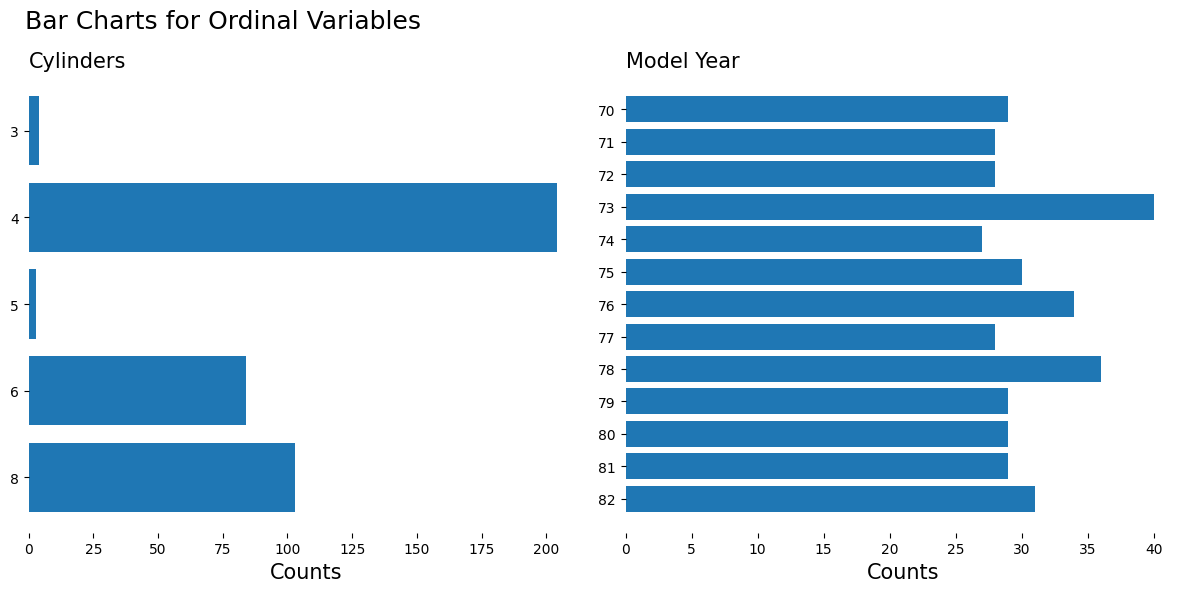

In [18]:
df_ordinal_plot = df_ordinal.copy()
df_ordinal_plot['Cylinders'] = df_ordinal_plot['Cylinders'].astype(str)
df_ordinal_plot['Model Year'] = df_ordinal_plot['Model Year'].astype(str)

fig = plt.figure(figsize=(12, 6))

fig.suptitle('Bar Charts for Ordinal Variables', fontsize=18, x=0.19)

for i, namecolumn in enumerate(df_ordinal_plot.columns):
    plt.subplot(1, 2, i+1)
    x = df_ordinal_plot.iloc[:,i].value_counts().sort_index(ascending=False)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(namecolumn, loc='left', fontsize=15)
    plt.xlabel('Counts', fontsize=15)
    plt.barh(x.index, x.values)
    ax = plt.gca()
    ax.set_frame_on(False)

plt.tight_layout()
plt.show()

In [19]:
cylinders_value = np.unique(df.loc[:,'Cylinders'])
model_year_value = np.unique(df.loc[:,'Model Year'])

cylinders_mapping = {cylinders_value[i]: i for i in range(len(cylinders_value))}
model_year_mapping = {model_year_value[i]: i for i in range(len(model_year_value))}

df_ordinal.loc[:,'Cylinders'] = df.loc[:,'Cylinders'].map(cylinders_mapping)
df_ordinal.loc[:,'Model Year'] = df.loc[:,'Model Year'].map(model_year_mapping)

In [20]:
df_ordinal.head()

,Cylinders,Model Year
0,4,0
1,4,0
2,4,0
3,4,0
4,4,0


In [21]:
df_categorical

,US Made
0,1
1,1
2,1
3,1
4,1
...,...
393,1
394,0
395,1
396,1


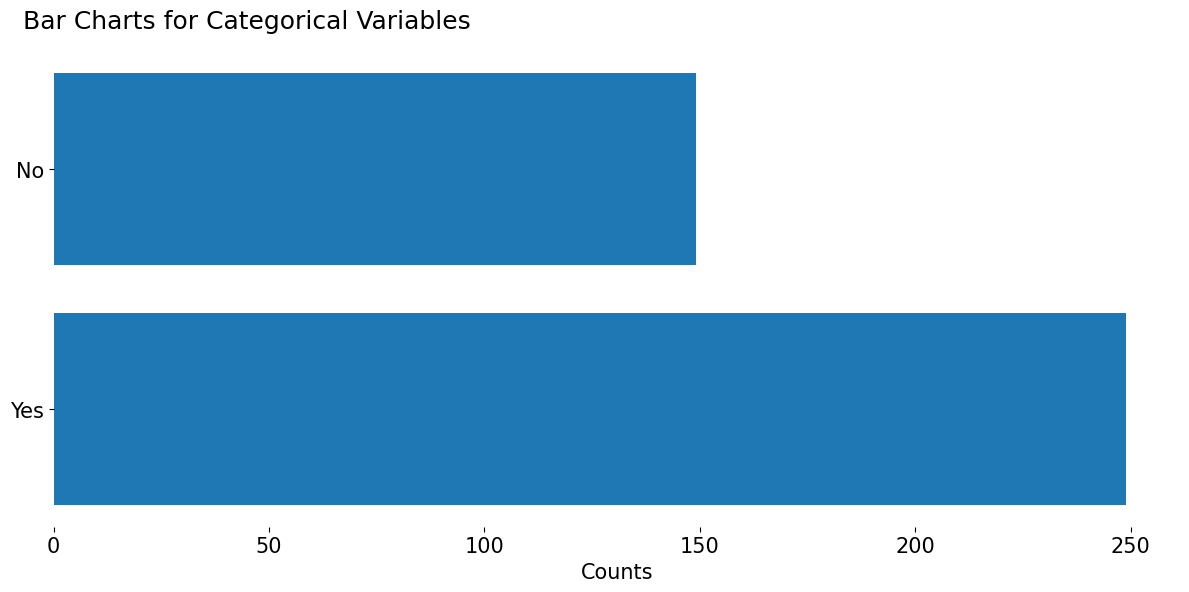

In [22]:
df_categorical_plot = []

for i in df_categorical.iloc[:,0]:
  if i == 1:
    df_categorical_plot.append('Yes')
  else:
    df_categorical_plot.append('No')

df_categorical_series = pd.Series(df_categorical_plot)

fig = plt.figure(figsize=(12, 6))

fig.suptitle('Bar Charts for Categorical Variables', fontsize=18, x=0.21)

plt.barh(df_categorical_series.value_counts().index, df_categorical_series.value_counts())
ax = plt.gca()
ax.set_frame_on(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Counts', fontsize=15)
plt.ylabel('')

plt.tight_layout()
plt.show()

In [23]:
df_categorical = pd.get_dummies(df_categorical, drop_first=True)

df_categorical = df_categorical.astype(int)

In [24]:
df_categorical.head()

,US Made
0,1
1,1
2,1
3,1
4,1


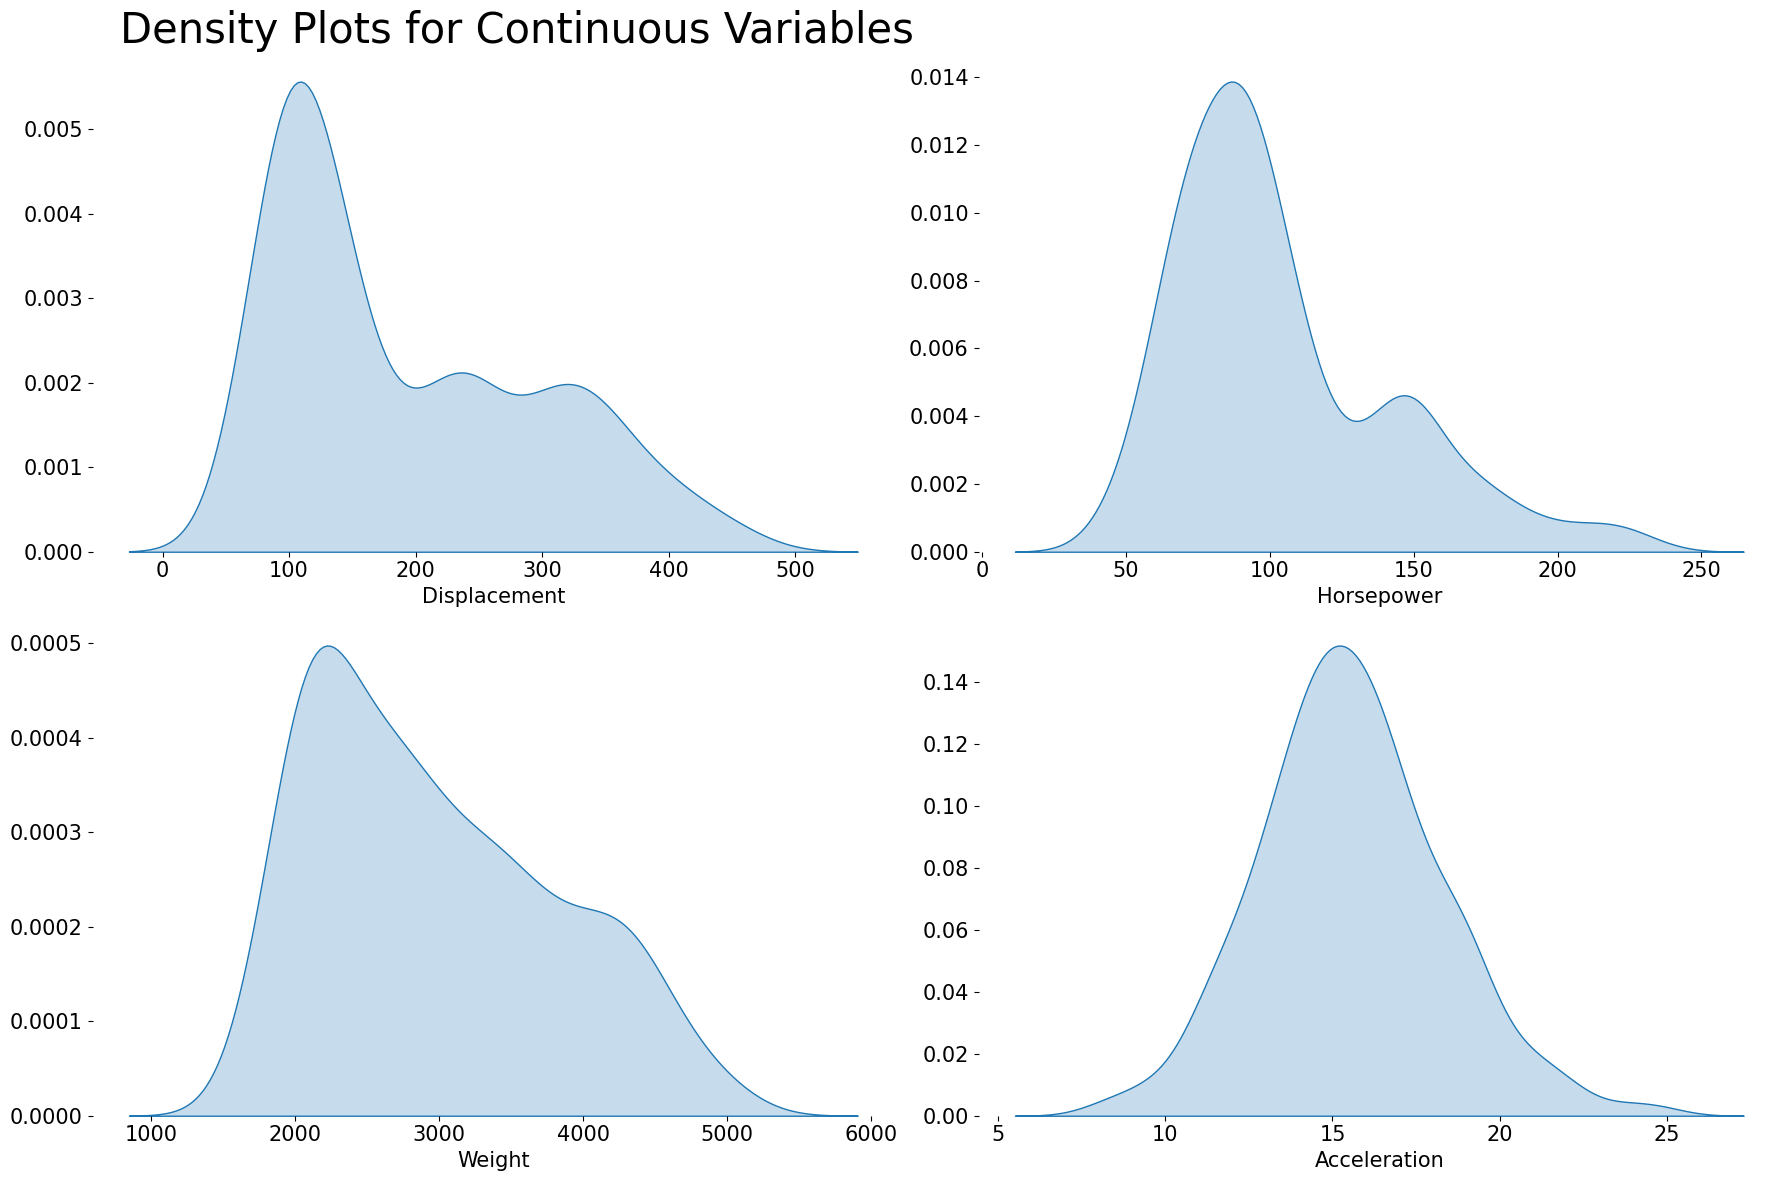

In [25]:
fig = plt.figure(figsize=(18, 12))

fig.suptitle('Density Plots for Continuous Variables', fontsize=30, x=0.29)

for i, column in enumerate(df_numerical.columns):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df[column], fill=True)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('')
    ax = plt.gca()
    ax.set_frame_on(False)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Density')

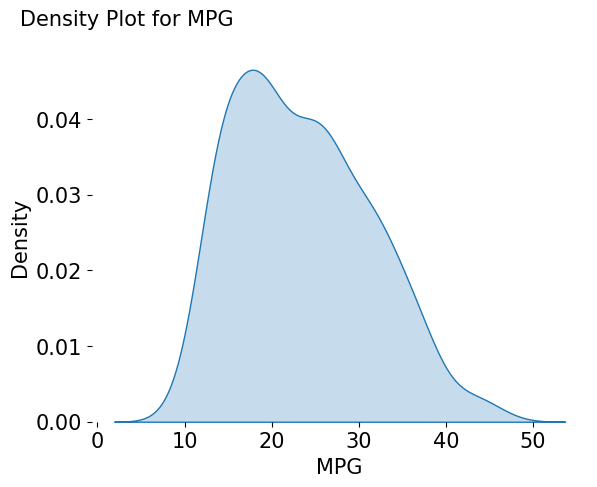

In [26]:
sns.kdeplot(y, fill=True)
ax = plt.gca()
ax.set_frame_on(False)
plt.title('Density Plot for MPG', fontsize=15, x=0.07, y=1.05)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('MPG', fontsize=15)
plt.ylabel('Density', fontsize=15)

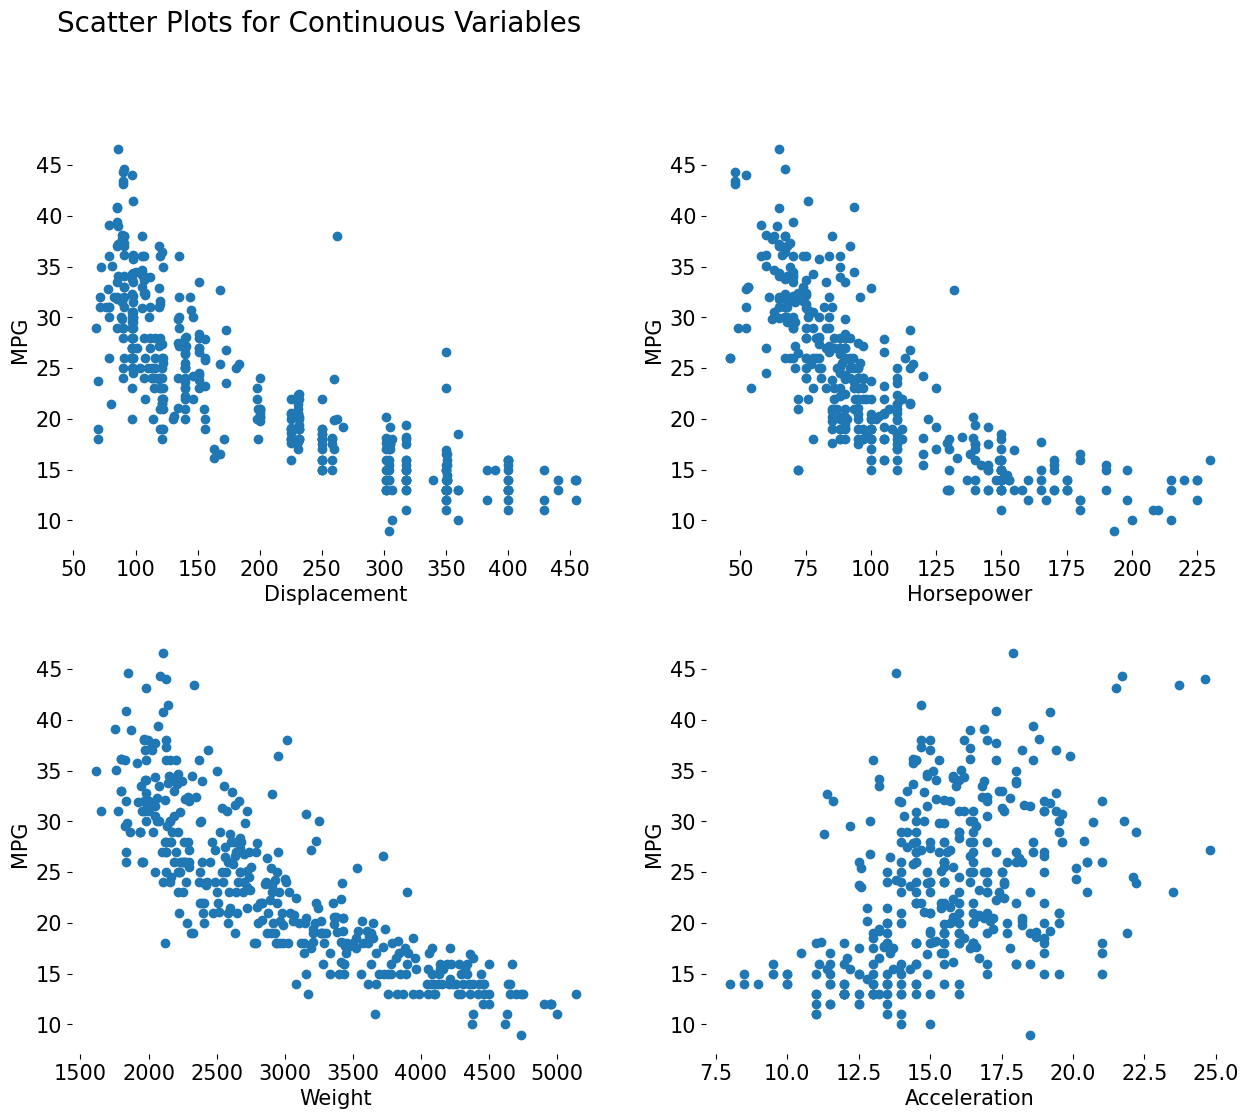

In [27]:
fig = plt.figure(figsize=(15,12))

fig.suptitle('Scatter Plots for Continuous Variables', fontsize=20, x=0.29)

for i, feature in enumerate(df_numerical.columns):
  plt.subplot(2, 2, i+1)
  plt.scatter(df_numerical.loc[:,feature], df.loc[:,'MPG'])
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel(feature, fontsize=15)
  plt.ylabel('MPG', fontsize=15)
  ax = plt.gca()
  ax.set_frame_on(False)

In [28]:
for column in df_numerical.columns:
    df_numerical[column], lambda_value = yeojohnson(df_numerical[column])

In [29]:
y, lambda_value = yeojohnson(y)

Text(0.07, 1.05, 'Density Plot for MPG')

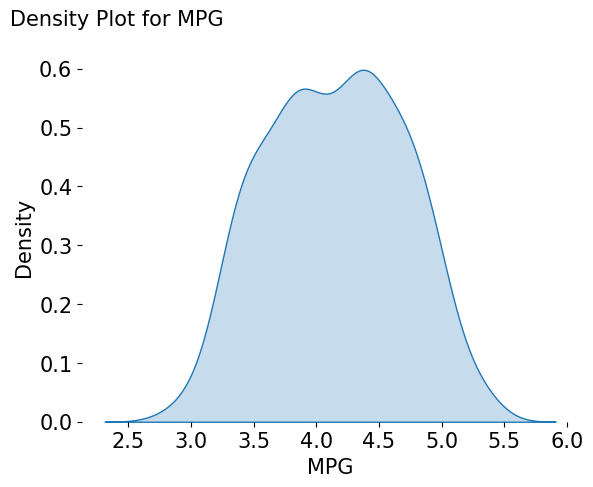

In [30]:
y = pd.Series(y)

sns.kdeplot(y, fill=True)
ax = plt.gca()
ax.set_frame_on(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('MPG', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Density Plot for MPG', fontsize=15, x=0.07, y=1.05)

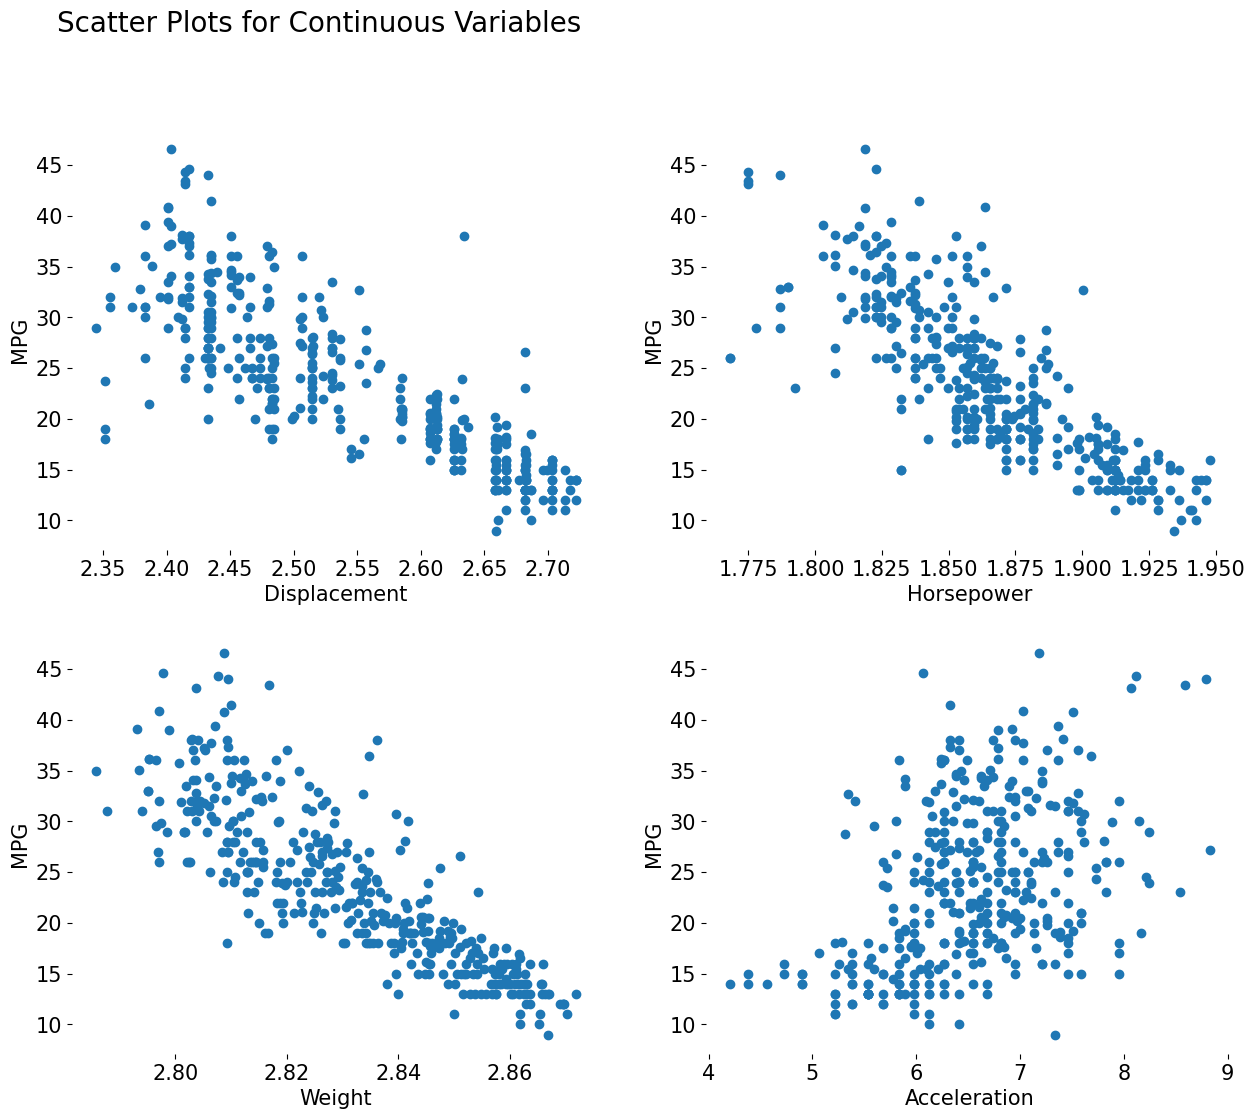

In [31]:
fig = plt.figure(figsize=(15,12))

fig.suptitle('Scatter Plots for Continuous Variables', fontsize=20, x=0.29)

for i, feature in enumerate(df_numerical.columns):
  plt.subplot(2, 2, i+1)
  plt.scatter(df_numerical.loc[:,feature], df.loc[:,'MPG'])
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel(feature, fontsize=15)
  plt.ylabel('MPG', fontsize=15)
  ax = plt.gca()
  ax.set_frame_on(False)

In [32]:
sc = StandardScaler()
df_numerical_sc = sc.fit_transform(df_numerical)
df_numerical = pd.DataFrame(df_numerical_sc, columns=df_numerical.columns)

In [33]:
df_numerical

,Displacement,Horsepower,Weight,Acceleration
0,1.129793,0.862976,0.754910,-1.327271
1,1.332841,1.454628,0.929331,-1.531864
2,1.185134,1.225934,0.689074,-1.740270
3,1.114248,1.225934,0.686130,-1.327271
4,1.103773,1.053950,0.701794,-1.952725
...,...,...,...,...
393,-0.274101,-0.330374,-0.037237,0.050072
394,-1.054715,-2.122864,-1.055091,2.983826
395,-0.347656,-0.405395,-0.764714,-1.490647
396,-0.591529,-0.604894,-0.259343,1.095085


In [34]:
df_ready_to_model = pd.concat([df_ordinal, df_categorical, df_numerical], axis=1)

In [35]:
df_ready_to_model.head()

,Cylinders,Model Year,US Made,Displacement,Horsepower,Weight,Acceleration
0,4,0,1,1.129793,0.862976,0.754910,-1.327271
1,4,0,1,1.332841,1.454628,0.929331,-1.531864
2,4,0,1,1.185134,1.225934,0.689074,-1.740270
3,4,0,1,1.114248,1.225934,0.686130,-1.327271
4,4,0,1,1.103773,1.053950,0.701794,-1.952725


In [36]:
y

,0
0,3.797507
1,3.521243
2,3.797507
3,3.617803
4,3.709738
...,...
393,4.450612
394,5.309115
395,4.740284
396,4.511818


In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_ready_to_model, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [38]:
# Linear regression using the "sci-kit learn" module
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

In [40]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.16924820593185416


In [41]:
# Linear regression using the "statsmodels" module
X2= sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2= est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     344.9
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          3.38e-142
Time:                        23:52:47   Log-Likelihood:                 84.469
No. Observations:                 318   AIC:                            -152.9
Df Residuals:                     310   BIC:                            -122.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.9560      0.068     58.590   

In [42]:
coefficients = est2.params

In [43]:
# Get the most significant variables
high_coefficients = coefficients.sort_values(ascending=False)

high_coefficients_list = []

for features, coefficients in enumerate(high_coefficients):
  if coefficients > 0:
    high_coefficients_list.append(high_coefficients.index[features])


if 'const' in high_coefficients_list:
  high_coefficients_list.remove('const')

print(high_coefficients_list)

['Model Year', 'Displacement']


In [44]:
# Define residuals
residuals = est2.resid
residuals

,0
0,0.161607
1,0.211785
2,0.000001
3,-0.053700
4,-0.038712
...,...
313,-0.348755
314,-0.111548
315,-0.420170
316,0.043860


In [45]:
# Define predicted values
y_pred = est2.fittedvalues
y_pred

,0
0,3.456196
1,4.238828
2,4.995395
3,5.005330
4,4.224645
...,...
313,4.230259
314,3.309341
315,4.467247
316,4.984982


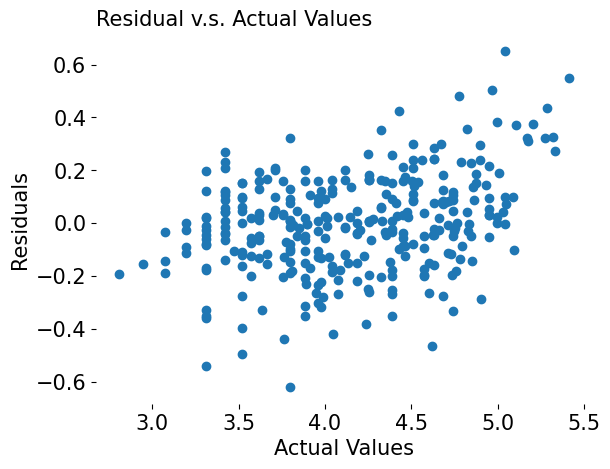

In [46]:
# Visualise the relationship between residuals and actual values
plt.scatter(y_train, residuals)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('Residual v.s. Actual Values', fontsize=15, loc='left')
ax = plt.gca()
ax.set_frame_on(False)

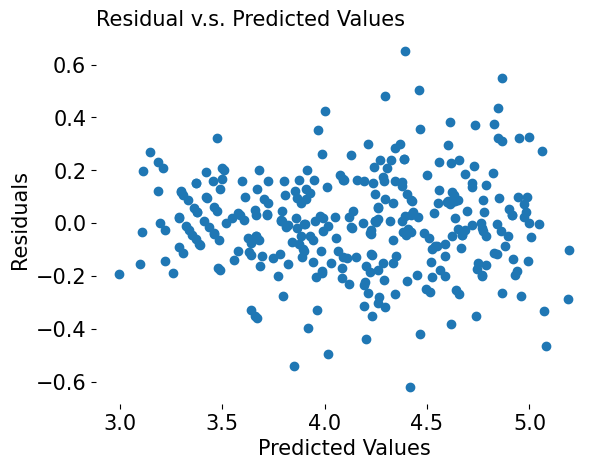

In [47]:
# Visualise the relationship between residuals and predicted values
plt.scatter(y_pred, residuals)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('Residual v.s. Predicted Values', loc='left', fontsize=15)
ax = plt.gca()
ax.set_frame_on(False)

Text(0.0, 1.0, 'Density Plot for Residuals')

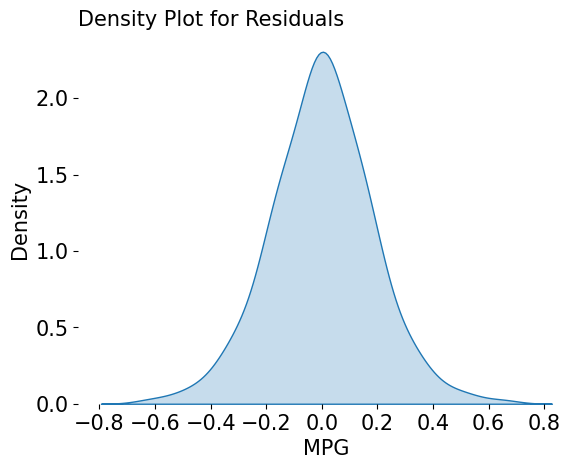

In [48]:
sns.kdeplot(residuals, fill=True)
ax = plt.gca()
ax.set_frame_on(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('MPG', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Density Plot for Residuals', fontsize=15, loc='left')

In [49]:
# Detect multicollinearity
df_numerical_feature_selection = df_numerical.copy()

def calc_vif(X: pd.DataFrame):

    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_result = calc_vif(df_numerical_feature_selection)
vif_result

,Features,VIF
0,Displacement,10.297251
1,Horsepower,9.379754
2,Weight,14.626262
3,Acceleration,3.029294


In [50]:
vif_result.dtypes

,0
Features,object
VIF,float64


In [51]:
for i in range(len(vif_result.index)):
  if np.max(vif_result.loc[:,'VIF'])>10:
    removed_index = vif_result.index[np.argmax(vif_result.loc[:,'VIF'])]
    removed_feature = vif_result.loc[removed_index, 'Features']
    df_numerical_feature_selection = df_numerical_feature_selection.drop(removed_feature, axis=1)
    vif_result = calc_vif(df_numerical_feature_selection)
    vif_result['VIF'] = vif_result.loc[:,'VIF'].astype(float)
  else:
    break

In [52]:
vif_result

,Features,VIF
0,Displacement,4.058622
1,Horsepower,5.975162
2,Acceleration,2.109242


In [53]:
# Remove the features outside the VIF selection above
columns_to_remove = []

for feature in X_train.columns:
  if feature in pd.concat([df_numerical_feature_selection, df_categorical, df_ordinal]).columns:
    removal_column = False
  else:
    removal_column = True
  columns_to_remove.append(removal_column)

columns_to_remove

[False, False, False, False, False, True, False]

In [54]:
X_train_feature_selection = X_train.copy()
X_test_feature_selection = X_test.copy()

X_train_feature_selection = X_train_feature_selection.drop(X_train_feature_selection.columns[columns_to_remove], axis=1)
X_test_feature_selection = X_test_feature_selection.drop(X_test_feature_selection.columns[columns_to_remove], axis=1)

In [55]:
X_train_feature_selection.head()

,Cylinders,Model Year,US Made,Displacement,Horsepower,Acceleration
0,4,0,1,1.114248,1.225934,-1.327271
1,1,0,0,-1.054715,-0.257853,-0.354700
2,1,12,0,-1.199588,-1.116439,0.960243
3,1,8,0,-1.199588,-1.570902,0.336720
4,1,5,0,-0.681811,-0.021841,-0.169123


In [56]:
sfs = SFS(model,
      k_features="best",  # Select the best number of features
      forward=True,        # Forward selection
      floating=False,      # Not Floating steps
      scoring="neg_mean_squared_error",  # Use negative MSE for scoring
      cv=5,                # 5-fold cross-validation
      verbose=1)           # Show progress

# Fit the SFS model on the training data
sfs = sfs.fit(X_train_feature_selection, y_train)

# Get the names of the selected features
selected_features = list(sfs.k_feature_names_)
print("Selected features:", selected_features)

Features: 6/6

Selected features: ['Model Year', 'Displacement', 'Horsepower', 'Acceleration']


In [57]:
X_train_feature_selection = X_train_feature_selection[selected_features]
X_test_feature_selection = X_test_feature_selection[selected_features]

In [58]:
# Obtain cook distances
influence = est2.get_influence()
cooks = influence.cooks_distance

In [59]:
# Color mapping for further visualisation
color_mapping = []

for cook in cooks[0]:
  if cook>4/len(X_train_feature_selection.index):
    cook_color = '#1f77b4'
  else:
    cook_color = 'grey'
  color_mapping.append(cook_color)

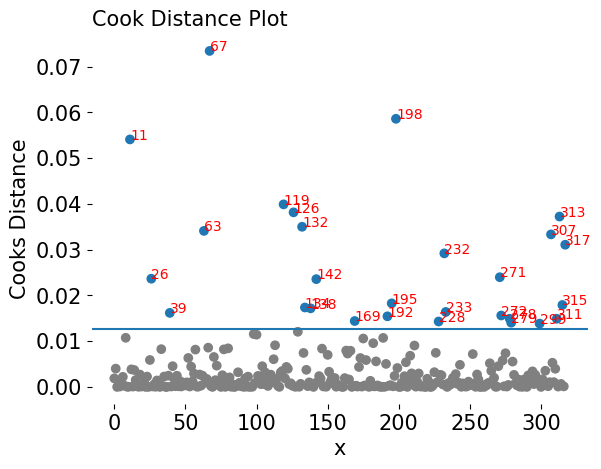

In [60]:
# Visualisation for cook distance plot
plt.scatter(X_train_feature_selection.index, cooks[0], color=color_mapping)
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.axhline(y=4/len(X_train_feature_selection.index), color='#1f77b4')

for index, distance in enumerate(cooks[0]):
    if distance > 4/len(X_train_feature_selection.index):
        plt.text(index, distance, f'{index}', color='red', fontsize=10)

ax = plt.gca()
ax.set_frame_on(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('Cooks Distance', fontsize=15)
plt.title('Cook Distance Plot', fontsize=15, loc='left')

plt.show()

In [61]:
# Remove the influencing points in the above cook distance plot
index_to_remove = []

for index, distance in enumerate(cooks[0]):
    if distance > 4/len(X_train_feature_selection.index):
      removed_index = index
      index_to_remove.append(removed_index)

index_to_remove

[11,
 26,
 39,
 63,
 67,
 119,
 126,
 132,
 134,
 138,
 142,
 169,
 192,
 195,
 198,
 228,
 232,
 233,
 271,
 272,
 278,
 279,
 299,
 307,
 311,
 313,
 315,
 317]

In [62]:
for index in X_train_feature_selection.index:
  if index in index_to_remove:
    X_train_feature_selection = X_train_feature_selection.drop(index, axis=0)
    y_train = y_train.drop(index, axis=0)

In [63]:
# Reset index
X_train_feature_selection = X_train_feature_selection.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [64]:
X2= sm.add_constant(X_train_feature_selection)
est = sm.OLS(y_train, X2)
est2= est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     821.8
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          4.40e-155
Time:                        23:52:51   Log-Likelihood:                 135.60
No. Observations:                 290   AIC:                            -261.2
Df Residuals:                     285   BIC:                            -242.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.8683      0.019    202.747   

In [65]:
# Linear regression using the "sci-kit learn" module
model = LinearRegression()
model.fit(X_train_feature_selection, y_train)

LinearRegression()

In [66]:
# Predict the target values for the test set
y_pred = model.predict(X_test_feature_selection)

In [67]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.18493486449829252


In [68]:
coefficients = est2.params

In [69]:
# Get the most significant variables
high_coefficients = coefficients.sort_values(ascending=False)

high_coefficients_list = []

for features, coefficients in enumerate(high_coefficients):
  if coefficients > 0:
    high_coefficients_list.append(high_coefficients.index[features])


if 'const' in high_coefficients_list:
  high_coefficients_list.remove('const')

print(high_coefficients_list)

['Model Year']


In [70]:
# Define residuals
residuals = est2.resid
residuals

,0
0,0.182590
1,0.172165
2,0.100696
3,0.058767
4,-0.135262
...,...
285,-0.081948
286,0.155482
287,-0.019976
288,-0.188851


In [71]:
# Define predicted values
y_pred = est2.fittedvalues
y_pred

,0
0,3.435213
1,4.278448
2,4.894700
3,4.892863
4,4.321194
...,...
285,3.603190
286,4.529948
287,3.637779
288,3.386644


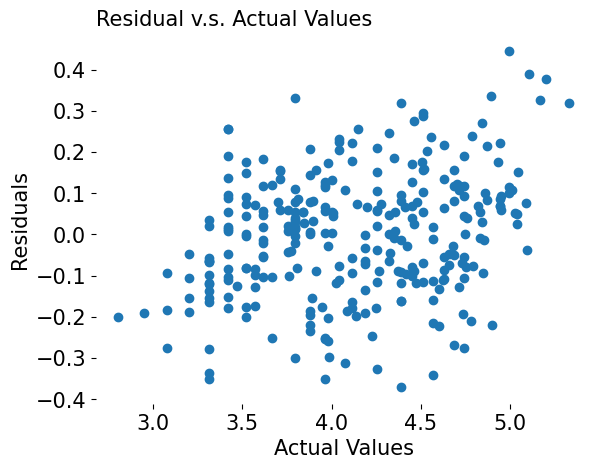

In [72]:
# Visualise the relationship between residuals and actual values
plt.scatter(y_train, residuals)
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('Residual v.s. Actual Values', fontsize=15, loc='left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = plt.gca()
ax.set_frame_on(False)

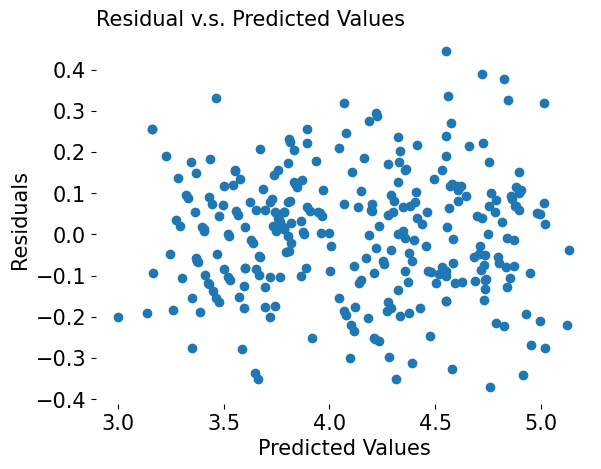

In [73]:
# Visualise the relationship between residuals and predicted values
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Residual v.s. Predicted Values', fontsize=15, loc='left')
ax = plt.gca()
ax.set_frame_on(False)

Text(0.0, 1.0, 'Density Plot for Residuals')

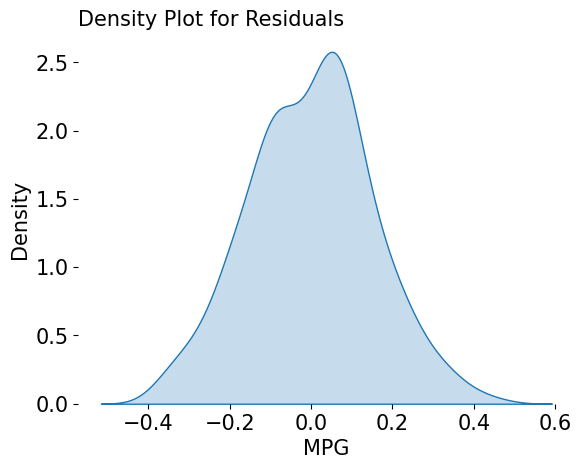

In [74]:
sns.kdeplot(residuals, fill=True)
ax = plt.gca()
ax.set_frame_on(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('MPG', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Density Plot for Residuals', fontsize=15, loc='left')